# Programming Exercise 2: Logistic Regression

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import copy #for hard copy assignment
from scipy import optimize #NLP optimize solver
from sklearn import preprocessing #use for polynomial mapping
%matplotlib inline

## 1 Logistic Regression
Build a logistic regression model to predict whether a student gets admitted into a university.

In [4]:
data=np.genfromtxt(r'https://raw.githubusercontent.com/eqiu/Classes/master/CS229/HW2/ex2data1.txt',delimiter=',')
X=data[:,0:2]
y=data[:,2]

### 1.1 Visualizing the data

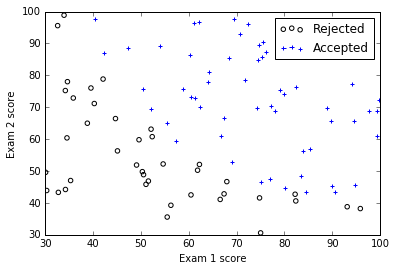

In [5]:
fig=plt.figure() #initiate figure
plt.scatter(X[y==0,0],X[y==0,1],facecolors='none',label='Rejected') #plot data
plt.scatter(X[y==1,0],X[y==1,1],marker='+',label='Accepted')
plt.xlabel('Exam 1 score') #set x axis
plt.ylabel('Exam 2 score') #set y axis
plt.ylim(30,100) #set limits
plt.xlim(30,100)
plt.legend()

### 1.2 Implementation

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
sigmoid(0) #should be .5

0.5

In [7]:
X=np.insert(X,0,1,axis=1) #insert 1's column for intercept

In [8]:
def costFunction(theta,X,y): #Loop or vectorized implementation. Loop does not seem to work with BFGS optimizer
    m=len(y)
    hx=sigmoid(np.dot(X,theta))
    #cost=0
    #for i in range(m): 
    #    cost+=(-y[i]*np.log(hx[i,0]))-(1-y[i])*np.log(1-hx[i,0])
    #cost=cost/m
    cost=np.sum(np.dot(-y.T,np.log(hx))-np.dot((1-y).T,np.log(1-hx)))/m #dot product can also be used instead of iteration
    return cost
def gradFunction(theta,X,y): 
    grad=np.empty(theta.shape) #this is the partial derivatives of cost function
    m=len(y)
    hx=sigmoid(np.dot(X,theta))
    for j in range(len(grad)):
        grad_temp=0
        for i in range(m):
            grad_temp+=(hx[i]-y[i])*X[i,j]
        grad[j]=grad_temp/m       
    return grad

In [9]:
theta=np.zeros((X.shape[1],1))
cost=costFunction(theta,X,y)
cost #this matches

0.69314718055994518

In [10]:
gradFunction(theta,X,y)

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

### 1.2.3 Learning parameters using BFGS
Use scipy.optimize.fmin to find the best parameters $\theta$ for the logistic regression cost function after passing initial values of parameters and a function that when given training set and particular $\theta$ computers the logistic regression cost and gradient with respect to $\theta$ for the dataset (X,y).

In [11]:
optimize.fmin(costFunction,x0=theta,args=(X,y))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


array([-25.16130062,   0.20623142,   0.20147143])

In [12]:
theta=optimize.fmin_tnc(func=costFunction,x0=theta,fprime=gradFunction,args=(X,y))[0] #another way to solve problem. This on requires gradient
theta #solution matches

array([-25.16131869,   0.20623159,   0.20147149])

### 1.2.4 Evaluating logistic regression
Student 1: Exam 1 score 45, exam 2 score 85

In [13]:
student_chance=sigmoid(np.dot(theta,np.array([1,45,85])))
print('For a student with exam scores of 45 and 85, he has a admissions probability of',student_chance)

For a student with exam scores of 45 and 85, he has a admissions probability of 0.776290625351


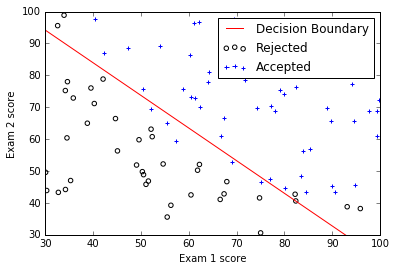

In [14]:
fig=plt.figure() #initiate figure
plt.scatter(X[y==0,1],X[y==0,2],facecolors='none',label='Rejected') #plot data
plt.scatter(X[y==1,1],X[y==1,2],marker='+',label='Accepted')
plt.xlabel('Exam 1 score') #set x axis
plt.ylabel('Exam 2 score') #set y axis
plt.ylim(30,100) #set limits
plt.xlim(30,100)
plot_x=np.array([30,100])
plot_y=np.array([(-1/theta[2])*(theta[0]+theta[1]*plot_x)])
plt.plot(plot_x,plot_y.T,'r',label='Decision Boundary')
plt.legend()

In [15]:
def predict(theta,X):
    output=np.empty(len(X))
    percents=sigmoid(np.dot(X,theta))
    output[percents>.5]=1
    output[percents<.5]=0
    return output
prediction=predict(theta,X)
prediction_test=np.sum(prediction==y)/len(y)
print('Percent of examples predicted correctly',prediction_test)

Percent of examples predicted correctly 0.89


## 2 Regularized logistic regression
Will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quailty assurance.

### 2.1 Visualize the data

In [16]:
data=np.genfromtxt(r'https://raw.githubusercontent.com/eqiu/Classes/master/CS229/HW2/ex2data2.txt',delimiter=',')
X=data[:,0:2]
y=data[:,2]

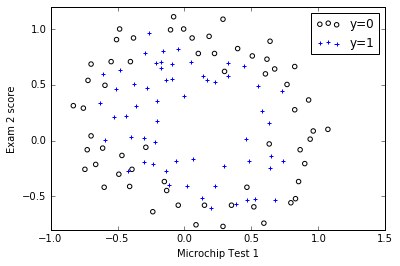

In [17]:
fig=plt.figure() #initiate figure
plt.scatter(X[y==0,0],X[y==0,1],facecolors='none',label='y=0') #plot data
plt.scatter(X[y==1,0],X[y==1,1],marker='+',label='y=1')
plt.xlabel('Microchip Test 1') #set x axis
plt.ylabel('Exam 2 score') #set y axis
plt.ylim(-.8,1.2) #set limits
plt.xlim(-1,1.5)
plt.legend()

### 2.2 Feature mapping

In [18]:
features=preprocessing.PolynomialFeatures(6).fit_transform(X) #use sklearn 
features.shape #turn into a 28 dimension vector

(118, 28)

In [19]:
X=features
theta=np.zeros((X.shape[1],1))

### 2.3  Cost function and gradient

In [20]:
def costFunctionReg(theta,X,y,lambda_val): #Loop or vectorized implementation. Loop does not seem to work with BFGS optimizer
    m=len(y)
    hx=sigmoid(np.dot(X,theta))
    cost=np.sum(np.dot(-y.T,np.log(hx))-np.dot((1-y).T,np.log(1-hx)))/m #dot product can also be used instead of iteration
    reg_term=lambda_val/(2*m)*np.sum(theta**2)
    return cost+reg_term
costFunctionReg(theta,X,y,1)

0.69314718055994529

In [21]:
def gradientFunctionReg(theta,X,y,lambda_val):
    grad=np.empty(theta.shape) #this is the partial derivatives of cost function
    m=len(y)
    hx=sigmoid(np.dot(X,theta))
    for j in range(len(grad)):
        grad_temp=0
        for i in range(m):
            grad_temp+=(hx[i]-y[i])*X[i,j]
        if j==0: #for first iteration
            grad[j]=grad_temp/m       
        else: #other iterations
            grad[j]=grad_temp/m+(lambda_val/m)*theta[j]   
    return grad
gradientFunctionReg(theta,X,y,1)

array([[  8.47457627e-03],
       [  1.87880932e-02],
       [  7.77711864e-05],
       [  5.03446395e-02],
       [  1.15013308e-02],
       [  3.76648474e-02],
       [  1.83559872e-02],
       [  7.32393391e-03],
       [  8.19244468e-03],
       [  2.34764889e-02],
       [  3.93486234e-02],
       [  2.23923907e-03],
       [  1.28600503e-02],
       [  3.09593720e-03],
       [  3.93028171e-02],
       [  1.99707467e-02],
       [  4.32983232e-03],
       [  3.38643902e-03],
       [  5.83822078e-03],
       [  4.47629067e-03],
       [  3.10079849e-02],
       [  3.10312442e-02],
       [  1.09740238e-03],
       [  6.31570797e-03],
       [  4.08503006e-04],
       [  7.26504316e-03],
       [  1.37646175e-03],
       [  3.87936363e-02]])

In [22]:
theta=optimize.fmin_tnc(func=costFunctionReg,x0=theta,fprime=gradientFunctionReg, args=(X,y,0))[0]
theta

array([  12.43692044,   15.16181467,    4.00001841, -132.48625504,
        -84.06021402,  -51.92228086, -130.57545959,  -88.33667346,
        -42.07102152,    6.51602255,  483.38591887,  452.31784605,
        522.89530085,  276.99449779,   74.45090769,  246.46340154,
        305.13189812,  307.66965359,  124.74629117,   45.0225104 ,
          3.87073235, -578.77959134, -724.53734301, -974.86472429,
       -735.62740064, -630.08464063, -301.95625305,  -60.14282716])

### 2.4 Plotting the decision boundary

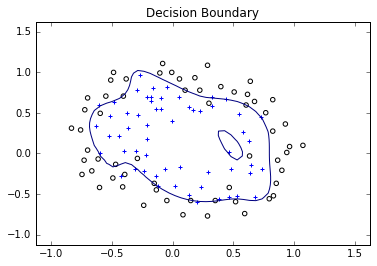

In [43]:
u=np.linspace(-1,1.5,50)
v=np.linspace(-1,1.5,50)
z=np.zeros((len(u),len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j]=np.dot(preprocessing.PolynomialFeatures(6).fit_transform(np.vstack((u[i],v[j])).T),theta)[0]
z=z.T
u,v=np.meshgrid(u,v)
plt.contour(u,v,z,[0])
plt.title("Decision Boundary")
plt.scatter(data[y==0,0],data[y==0,1],facecolors='none',label='y=0') #plot data
plt.scatter(data[y==1,0],data[y==1,1],marker='+',label='y=1')

### 2.5 Optional

In [45]:
lambda_val=50
theta=optimize.fmin_tnc(func=costFunctionReg,x0=np.zeros((X.shape[1],1)),fprime=gradientFunctionReg, args=(X,y,lambda_val))[0]
theta

array([ 0.03760688, -0.02776978,  0.03209992, -0.10459889, -0.0288966 ,
       -0.06193232, -0.03256609, -0.0138863 , -0.01771271, -0.0345301 ,
       -0.08566215, -0.00477057, -0.02728826, -0.00774723, -0.0746998 ,
       -0.03964464, -0.00912041, -0.00680653, -0.01202526, -0.01044583,
       -0.05646892, -0.06786019, -0.00195033, -0.01394367, -0.00070516,
       -0.01553714, -0.00348431, -0.07612255])

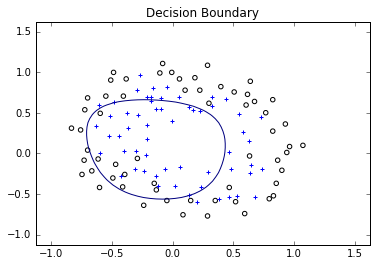

In [46]:
u=np.linspace(-1,1.5,50)
v=np.linspace(-1,1.5,50)
z=np.zeros((len(u),len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j]=np.dot(preprocessing.PolynomialFeatures(6).fit_transform(np.vstack((u[i],v[j])).T),theta)[0]
z=z.T
u,v=np.meshgrid(u,v)
plt.contour(u,v,z,[0])
plt.title("Decision Boundary")
plt.scatter(data[y==0,0],data[y==0,1],facecolors='none',label='y=0') #plot data
plt.scatter(data[y==1,0],data[y==1,1],marker='+',label='y=1')